# Travel Insurance
Обслуживающему туристическому страховому агенству необходимо принимать решения о выплате или невыплате страховой компенсации застрахованному лицу.
Принять это решение могут помочь методы машинного обучения.
Дана таблица, в которой описаны 63326 случаев страхования туристов агенством из Сингапура.
"В столбцах таблицы представлена информация о страховых случаях, а именно:
* название агенства
* тип агенства страхования
* способ поставки полиса туристического страхования
* название полиса страхования
* сумма продаж полисов туристического страхования
* комиссия, полученная агентством по страхованию путешествий
* продолжительность страхования
* место путешествия
* пол застрахованного лица
* возраст застрахованного лица
* статус выплаты (совершена или нет)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Чтение данных

In [2]:
data = pd.read_csv('./data/travel_insurance.csv')
data.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


## 2.1 Основные характеристики данных

In [3]:
data[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']].describe()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
count,63326,63326,63326,63326,63326,63326,18219
unique,16,2,2,26,2,149,2
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE,M
freq,35119,45869,62219,18630,62399,13255,9347


In [4]:
data[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [5]:
for name in ['Duration', 'Net Sales']:
    print([x for x in np.unique(data[[name]]) if x < 0])

[-2, -1]
[-389.0, -357.5, -297.0, -291.75, -289.0, -287.4, -287.1, -281.0, -277.2, -259.2, -252.85, -247.5, -217.8, -216.75, -216.0, -207.9, -198.0, -178.2, -168.3, -161.0, -158.4, -148.5, -147.0, -138.6, -138.0, -130.0, -128.7, -128.0, -125.0, -121.0, -118.8, -112.0, -109.0, -108.9, -107.0, -102.0, -99.0, -98.0, -96.0, -95.0, -93.0, -90.0, -89.1, -86.0, -85.0, -84.0, -80.0, -79.2, -78.0, -77.0, -76.0, -75.0, -74.9, -72.0, -71.0, -70.85, -70.0, -69.3, -69.0, -68.0, -67.0, -66.0, -65.0, -63.0, -62.0, -61.0, -60.0, -59.4, -59.0, -58.0, -57.0, -56.0, -55.0, -54.5, -53.5, -53.25, -53.0, -52.0, -51.0, -50.0, -49.5, -48.5, -48.0, -47.5, -47.0, -45.0, -44.0, -43.0, -42.0, -41.0, -40.0, -39.6, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.5, -32.0, -31.0, -30.0, -29.9, -29.7, -29.5, -29.0, -28.5, -27.0, -26.5, -26.0, -25.2, -25.07, -25.0, -24.5, -24.0, -23.0, -22.61, -22.0, -21.0, -20.0, -19.8, -19.0, -18.0, -17.0, -16.0, -15.0, -14.4, -14.39, -14.0, -13.5, -13.0, -12.0, -11.93, -11.0, -10.0, 

После подсчёта основных характеристик видно, что с датасет имеет особенности.

В исходном описании датасета минимальная продолжительность путешествия (Duration) принимает отрицательные значения. Такая же ситуация с суммами продаж туристических полисов (Net Sales).

Исключим такие записи из датасета:

In [6]:
data=data[data['Duration'] >= 0]
data=data[data['Net Sales'] >= 0]
data[['Net Sales', 'Duration']].describe()

,Net Sales,Duration
count,62643.000000,62643.000000
mean,41.803969,48.960921
std,47.635665,101.929382
min,0.000000,0.000000
25%,18.000000,9.000000
50%,27.000000,22.000000
75%,49.000000,52.000000
max,810.000000,4881.000000


## 2.2 Визуализация данных

/home/ntimakin/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


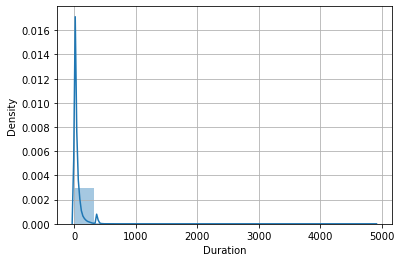

In [7]:
sns.distplot(data['Duration'], bins=15)
plt.grid()

/home/ntimakin/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


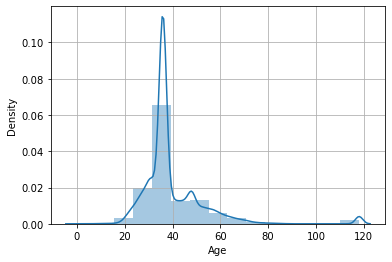

In [8]:
sns.distplot(data['Age'], bins=15)
plt.grid()

Из полученных гистограмм видно, что, например, продолжительность большей массы путешествий не более двух недель, а около 20% застрахованных - люди в возрасте 35-40 лет.

/home/ntimakin/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


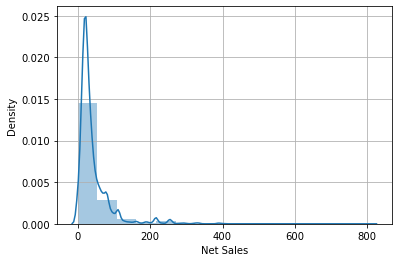

In [9]:
sns.distplot(data['Net Sales'], bins=15)
plt.grid()

/home/ntimakin/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


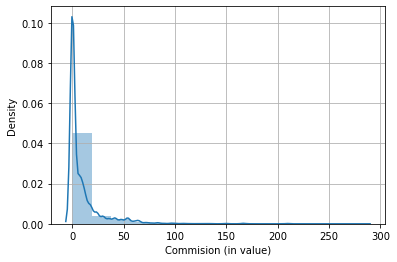

In [10]:
sns.distplot(data['Commision (in value)'], bins=15)
plt.grid()

Также можно заметить, что сумма продаж полисов туристического страхования и комиссия туристического агенства похожи на скореллированные величины. Проверим это, построив матрицу корреляции

<AxesSubplot:>

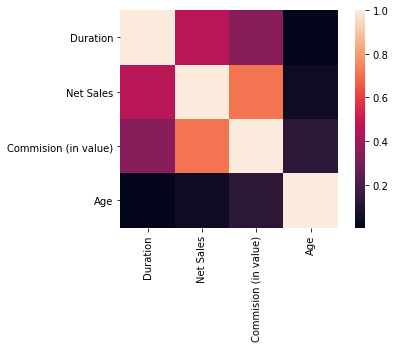

In [12]:
sns.heatmap(data.corr(), square=True)

## 3. Пропущенные значения

Пропущенные значения в графе "пол". Заполним их значением NA

In [11]:
data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  44532
Age                         0
dtype: int64

In [12]:
data['Gender'].fillna('NA', inplace = True)
data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

## 4. Категориальные признаки

Переведем категориальные признаки в числовое представление и бинаризуем их.

In [13]:
inp_cat = data[["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination", "Gender"]]
inp_non_cat = data[["Claim", "Duration", "Net Sales", "Commision (in value)", "Age"]]
data_bin = pd.get_dummies(inp_cat)
data_bin = pd.concat([data_bin, inp_non_cat], axis=1)
data_bin.head(12)

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_ZAMBIA,Destination_ZIMBABWE,Gender_F,Gender_M,Gender_NA,Claim,Duration,Net Sales,Commision (in value),Age
21,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,No,12,46.15,11.54,44
22,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,No,7,17.55,4.39,25
23,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,Yes,12,94.00,23.50,34
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,No,190,294.75,73.69,26
25,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,No,364,389.00,97.25,30
26,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,No,29,9.90,5.94,33
27,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,No,28,9.90,5.94,33
28,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,No,153,69.30,41.58,35
29,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,No,28,19.80,11.88,31
30,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,No,4,29.70,17.82,61


Переведем также в числовое представление целевой столбец

In [15]:
data_bin['Claim'].replace(to_replace={'No':0, 'Yes':1}, inplace=True)
data_bin.head(5)

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_ZAMBIA,Destination_ZIMBABWE,Gender_F,Gender_M,Gender_NA,Claim,Duration,Net Sales,Commision (in value),Age
21,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,12,46.15,11.54,44
22,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,7,17.55,4.39,25
23,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,12,94.00,23.50,34
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,190,294.75,73.69,26
25,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,364,389.00,97.25,30


## 5. Нормализация данных

In [16]:
data_bin = (data_bin - data_bin.min()) / (data_bin.max() - data_bin.min())
data_bin.head(5)

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_ZAMBIA,Destination_ZIMBABWE,Gender_F,Gender_M,Gender_NA,Claim,Duration,Net Sales,Commision (in value),Age
21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.002459,0.056975,0.040705,0.372881
22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.001434,0.021667,0.015485,0.211864
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.002459,0.116049,0.082892,0.288136
24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.038926,0.363889,0.259929,0.220339
25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.074575,0.480247,0.343034,0.254237


## 5.5. Несбалансированность классов

In [19]:
data_bin['Claim'].value_counts()

0.0    61719
1.0      924
Name: Claim, dtype: int64

## 6. Разделим датасет на обучающую и тестовую выборки

In [17]:
x = np.array(data_bin.drop('Claim', axis=1))
y = np.array(data_bin['Claim'], dtype=int)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

## 7. Применение kNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

for k in [3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    train_prediction = knn.predict(x_train)
    test_prediction = knn.predict(x_test)
    
    print(f'k = {k}, test_accuracy = {accuracy_score(test_prediction, y_test)}, train_accuracy = {accuracy_score(train_prediction, y_train)}')
    print(f'k = {k}, test_f1_score = {f1_score(test_prediction, y_test)}, train_f1_score = {f1_score(train_prediction, y_train)}')

k = 3, test_accuracy = 0.9810838853859047, train_accuracy = 0.9864109829588538
k = 3, test_f1_score = 0.016597510373443983, train_f1_score = 0.16236162361623616
k = 5, test_accuracy = 0.9822811078298348, train_accuracy = 0.9860318473879555
k = 5, test_f1_score = 0.008928571428571428, train_f1_score = 0.051490514905149054
k = 10, test_accuracy = 0.9828398116370022, train_accuracy = 0.985852256854372
k = 10, test_f1_score = 0.0, train_f1_score = 0.0


## 7. PCA

In [23]:
f'Признаков после бинаризации стало: {x.shape[1]}'

'Всего признаков после бинаризации: 201'

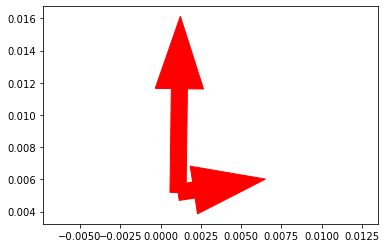

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x)
v0 = pca.components_[0]
v1 = pca.components_[1]

plt.arrow(pca.mean_[0], pca.mean_[1], v0[0], v0[1], color = 'r')
plt.arrow(pca.mean_[0], pca.mean_[1], v1[0], v1[1], color = 'r')
plt.axis('equal');

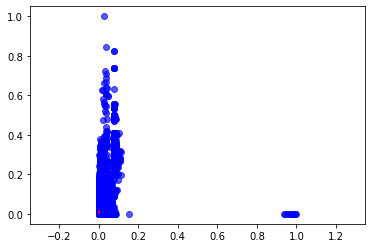

In [27]:
plt.scatter(x[:, -4], x[:, -3], color='b', alpha = 0.65)
plt.arrow(pca.mean_[0], pca.mean_[1], v0[0], v0[1], color = 'r')
plt.arrow(pca.mean_[0], pca.mean_[1], v1[0], v1[1], color = 'r')
plt.axis('equal');

In [34]:
pca.explained_variance_

array([1.04738117, 0.37272543])

In [46]:
components = list(range(1,10))
train_errors = []
test_errors = []
for n_components in components:
    pca = PCA(n_components=n_components).fit(x_train)
    pca_x_train = pca.transform(x_train)
    pca_x_test = pca.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_x_train, y_train)
    
    train_error = 1 - accuracy_score(y_train, knn.predict(pca_x_train))
    test_error = 1 - accuracy_score(y_test, knn.predict(pca_x_test))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print(f'n = {n_components}, train_error = {train_error}, test_error = {test_error}')

n = 1, train_error = 0.013409426507562716, test_error = 0.018836299784499966
n = 2, train_error = 0.013329608492636758, test_error = 0.01915555910288136
n = 3, train_error = 0.013429381011294206, test_error = 0.018995929443690662
n = 4, train_error = 0.013509199026220164, test_error = 0.018995929443690662
n = 5, train_error = 0.013489244522488675, test_error = 0.01891611461409526
n = 6, train_error = 0.013489244522488675, test_error = 0.018836299784499966
n = 7, train_error = 0.013469290018757185, test_error = 0.019075744273285955
n = 8, train_error = 0.013289699485173778, test_error = 0.019395003591667348
n = 9, train_error = 0.013529153529951765, test_error = 0.01923537393247665


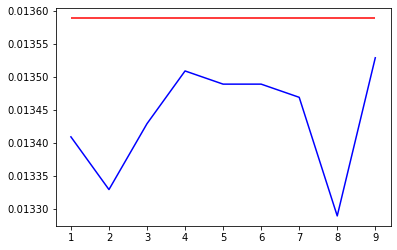

In [50]:
ref_train_error = 1-0.9864109829588538
plt.plot(components, train_errors, color='b')
plt.hlines(ref_train_error, components[0], components[-1], color='r')

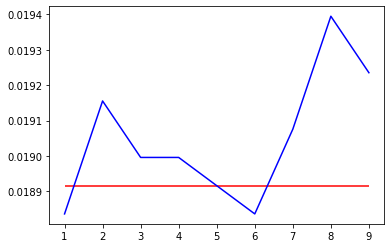

In [49]:
ref_test_error = 1-0.9810838853859047
plt.plot(components, test_errors, color='b')
plt.hlines(ref_test_error, components[0], components[-1], color='r')

## LDA


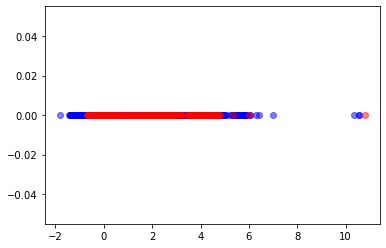

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1).fit(x_train, y_train)
x_lda = lda.transform(x_train)

plt.scatter(x_lda[y_train == 0, 0], np.zeros(len(x_lda[y_train == 0, 0])), color='b', alpha = 0.5)
plt.scatter(x_lda[y_train == 1, 0],  np.zeros(len(x_lda[y_train == 1, 0])), color='r', alpha = 0.5)

In [33]:
# x_test_lda = lda.transform(x_test)
accuracy_score(lda.predict(x_test), y_test)

0.9632851783861441